### Introduction

## Read and Preprocess

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import keras
import seaborn as sns
import matplotlib.pyplot as plt
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly


In [2]:
df=pd.read_csv('BH11D_labelled.csv', index_col=0)

In [3]:
df.head()

,CH4,CO2,O2,BaroPres,Batt,Label
senseDate,,,,,,
03/30/2016 16:01,0.24,0.04,20.94,1007.64,6.29,0
03/30/2016 16:12,0.24,0.04,20.75,1007.64,6.29,0
03/30/2016 16:23,0.28,0.04,20.73,1007.64,6.33,0
03/30/2016 17:21,0.32,0.04,20.63,1008.11,6.22,0
03/30/2016 18:19,0.35,0.04,20.52,1009.06,6.21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12424 entries, 03/30/2016 16:01 to 11/17/2017 16:17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CH4       12424 non-null  float64
 1   CO2       12424 non-null  float64
 2   O2        12424 non-null  float64
 3   BaroPres  12424 non-null  float64
 4   Batt      12424 non-null  float64
 5   Label     12424 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 679.4+ KB


Before we can feed data into the neural network we must perform some preprocessing. 

In [5]:
df.describe(include='all')

,CH4,CO2,O2,BaroPres,Batt,Label
count,12424.000000,12424.000000,12424.000000,12424.000000,12424.000000,12424.000000
mean,0.817271,0.891484,18.439544,1015.656364,6.142259,0.008773
std,1.682823,0.987634,1.263979,12.716474,0.339152,0.093258
min,0.000000,0.040000,3.760000,819.220000,4.100000,0.000000
25%,0.220000,0.660000,17.590000,1010.480000,5.940000,0.000000
50%,0.300000,0.860000,18.420000,1016.650000,6.020000,0.000000
75%,0.810000,1.030000,19.240000,1021.870000,6.390000,0.000000
max,54.820000,30.730000,21.870000,1042.760000,7.330000,1.000000


In [6]:
corrm = df.corr()
corrm

,CH4,CO2,O2,BaroPres,Batt,Label
CH4,1.000000,0.836321,-0.527925,-0.065202,-0.080848,0.182193
CO2,0.836321,1.000000,-0.672440,-0.040431,-0.251743,0.040961
O2,-0.527925,-0.672440,1.000000,0.067224,0.620642,-0.089171
BaroPres,-0.065202,-0.040431,0.067224,1.000000,0.164369,0.000309
Batt,-0.080848,-0.251743,0.620642,0.164369,1.000000,-0.057813
Label,0.182193,0.040961,-0.089171,0.000309,-0.057813,1.000000


We can see that CH4 and CO2 are highly (positively) correlated, and CO2 and O2 are highly (negatively) correlated. 

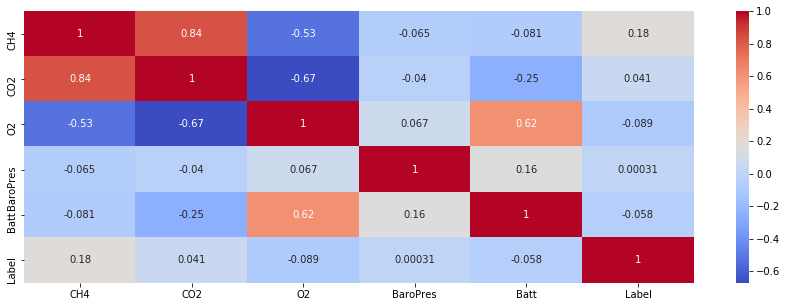

In [7]:
plt.figure(figsize=(15,5))
heatmapdf = sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

<!-- We can see that, co2 and ch4 are highly (positively) correlated -->

In [8]:
df.columns

Index(['CH4', 'CO2', 'O2', 'BaroPres', 'Batt', 'Label'], dtype='object')

We will use only CO2 data for our training model

In [9]:

df.drop(['CH4', 'O2', 'Batt', 'BaroPres'], axis=1, inplace=True)

In [10]:
# df.set_index('senseDate', inplace=True)
df.head()

,CO2,Label
senseDate,,
03/30/2016 16:01,0.04,0
03/30/2016 16:12,0.04,0
03/30/2016 16:23,0.04,0
03/30/2016 17:21,0.04,0
03/30/2016 18:19,0.04,0


In [11]:
# plt.plot(df, label='CO2')
# plt.legend();

## Inferential Statistics


Let's perform a hypothesis testing,
Null Hypothesis: CO2 sensor data  is a normal distribution
Alternate Hypothesis: CO2 sensor data  is a normal distribution
Significance level alpha is 0.05

In [12]:
from scipy import stats
stats.normaltest(df.CO2)

NormaltestResult(statistic=20288.09149080334, pvalue=0.0)

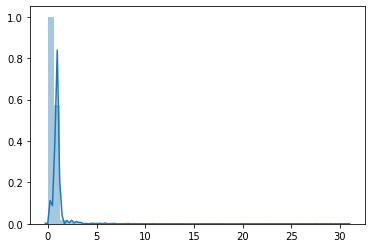

In [13]:
sns.distplot(df)

Since the value of p is smaller than 0.05 (almost zero), we can  reject the null hypothesis. The data is not normally distributed

In [33]:
from sklearn import preprocessing
x_array = np.array(df['CO2'])
normalized_X = preprocessing.normalize([x_array])
dftest=pd.DataFrame(normalized_X)
dftest=dftest.transpose()
dftest.head()


,0
0,-0.006101
1,-0.006101
2,-0.006101
3,-0.006101
4,-0.006101


In [15]:
stats.normaltest(dftest)

NormaltestResult(statistic=array([20288.0914908]), pvalue=array([0.]))

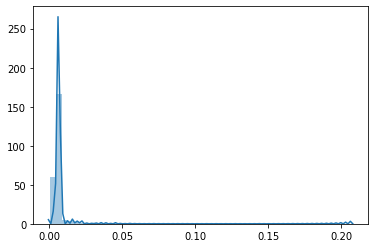

In [16]:
sns.distplot(dftest)

In [17]:
train_size = int(len(df) * 0.85)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(train.shape, test.shape)

(10560, 2) (1864, 2)


In [18]:

scaler = StandardScaler()
scaler = scaler.fit(train[['CO2']])
train['CO2'] = scaler.transform(train[['CO2']])
test['CO2'] = scaler.transform(test[['CO2']])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

Let's create sequences with 10 days worth of historical data:

In [41]:
TIME_STEPS = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train[['CO2']],train.Label,TIME_STEPS)
X_test, y_test = create_dataset(test[['CO2']],test.Label,TIME_STEPS)
print(X_train.shape)

(10550, 10, 1)


In [42]:

model = keras.Sequential()
model.add(keras.layers.LSTM(units=64,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train.shape[2])))
model.compile(loss='mae', optimizer='adam')

In [43]:
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_split=0.1,shuffle=False)

Epoch 1/10
297/297 [==============================] - 3s 11ms/step - loss: 0.0100 - val_loss: 0.0031
Epoch 2/10
297/297 [==============================] - 3s 9ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 3/10
297/297 [==============================] - 3s 9ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 4/10
297/297 [==============================] - 3s 8ms/step - loss: 7.6694e-04 - val_loss: 0.0029
Epoch 5/10
297/297 [==============================] - 3s 9ms/step - loss: 5.4442e-04 - val_loss: 0.0030
Epoch 6/10
297/297 [==============================] - 3s 8ms/step - loss: 3.6094e-04 - val_loss: 0.0030
Epoch 7/10
297/297 [==============================] - 3s 9ms/step - loss: 2.1353e-04 - val_loss: 0.0032
Epoch 8/10
297/297 [==============================] - 3s 9ms/step - loss: 2.0614e-04 - val_loss: 0.0031
Epoch 9/10
297/297 [==============================] - 3s 9ms/step - loss: 2.3232e-04 - val_loss: 0.0031
Epoch 10/10
297/297 [==============================] - 3s 9ms/step - loss: 

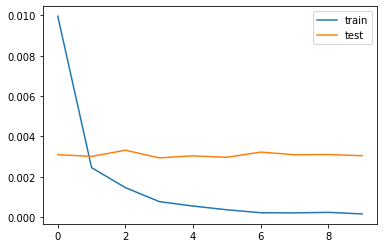

In [44]:
# compare the trian test error

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

Let’s calculate the Mean Absolute Error (MAE) on the training data:

In [45]:
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

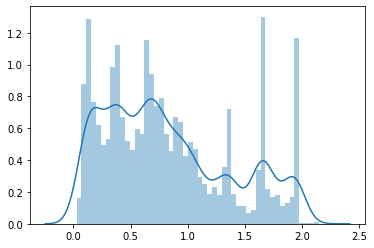

In [46]:

sns.distplot(train_mae_loss, bins=50);

In [47]:
print('test loss and test accuracy:', model.evaluate(X_test,y_test))

58/58 [==============================] - 0s 3ms/step - loss: 0.0574
test loss and test accuracy: 0.057364583015441895


Let's pick a threshold of 0.6
Above this will be categorized as anomaly

In [48]:
th=0.6
# calculate the error on test data
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [49]:
# create a new dataframe containing of loss and errors above threshold
test_score_df = pd.DataFrame(index=test[TIME_STEPS:].index)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = th
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold
test_score_df['CO2'] = test[TIME_STEPS:].CO2

In [50]:
test_score_df.head()

,loss,threshold,anomaly,CO2
senseDate,,,,
08/25/2017 19:37,0.834139,0.6,True,0.993584
08/25/2017 20:38,0.808481,0.6,True,1.022092
08/25/2017 21:38,0.817033,0.6,True,1.022092
08/25/2017 22:39,0.842688,0.6,True,1.050599
08/25/2017 23:40,0.871195,0.6,True,1.022092


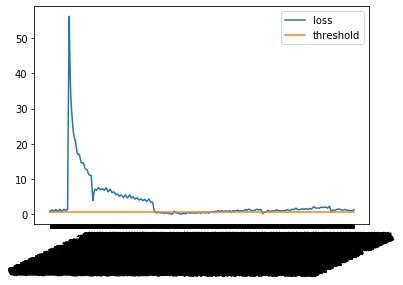

In [51]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [52]:

anomalies = test_score_df[test_score_df.anomaly == True]
anomalies

,loss,threshold,anomaly,CO2
senseDate,,,,
08/25/2017 19:37,0.834139,0.6,True,0.993584
08/25/2017 20:38,0.808481,0.6,True,1.022092
08/25/2017 21:38,0.817033,0.6,True,1.022092
08/25/2017 22:39,0.842688,0.6,True,1.050599
08/25/2017 23:40,0.871195,0.6,True,1.022092
...,...,...,...,...
11/17/2017 07:55,1.113503,0.6,True,1.392691
11/17/2017 10:01,1.156264,0.6,True,1.364183
11/17/2017 12:05,1.210427,0.6,True,1.193137


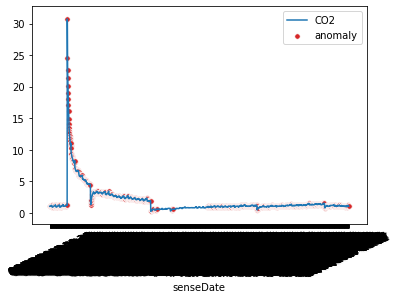

In [53]:
plt.plot(test[TIME_STEPS:].index, scaler.inverse_transform(test[TIME_STEPS:].CO2), label='CO2');
# plt.figure(figsize=(15,8))
sns.scatterplot(anomalies.index,scaler.inverse_transform(anomalies.CO2),color=sns.color_palette()[3],s=30, label='anomaly')
plt.xticks(rotation=25)
plt.legend();

## Precision-Recall Curve

In [63]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [60]:
from sklearn.metrics import precision_recall_curve, roc_auc_score

# precision, recall, thresholds = precision_recall_curve(y_train, model.predict_proba(X_train)[:,1], pos_label=1)
# plot_precision_recall(precision, recall, thresholds)

roc_auc_score(y_train, X_train_pred)


ValueError: Found array with dim 3. Estimator expected <= 2.